In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter

import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"top100_kdrama.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          100 non-null    int64  
 1   Title       100 non-null    object 
 2   Genre       100 non-null    object 
 3   Tags        100 non-null    object 
 4   Synopsis    100 non-null    object 
 5   Rank        100 non-null    int64  
 6   Popularity  100 non-null    int64  
 7   Score       100 non-null    float64
 8   Episodes    100 non-null    int64  
 9   Duration    100 non-null    int64  
 10  Watchers    100 non-null    object 
 11  Start_date  100 non-null    object 
 12  End_date    88 non-null     object 
 13  Day_aired   100 non-null    object 
 14  Main Role   100 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.8+ KB


In [3]:
df.head(3)

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,"64,103",5/14/2021,NaN,Friday,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,"32,415",11/18/2022,NaN,Friday,"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
2,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lea...",Everyday is extraordinary for five doctors and...,14,177,9.1,12,100,"43,574",6/17/2021,9/16/2021,Thursday,"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."


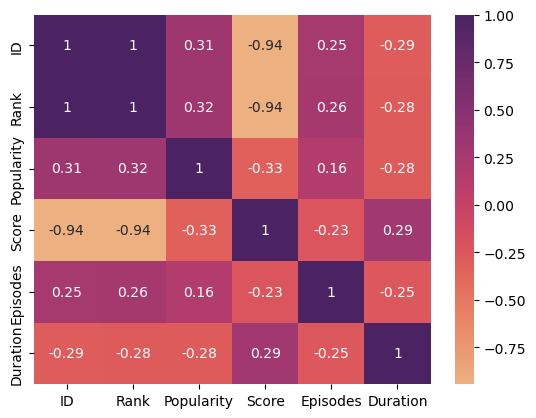

In [18]:
sns.heatmap(df.corr(), annot=True, cmap="flare")
plt.show()

In [4]:
df_copy = df.copy()

In [5]:
df_copy["Start_date"] = pd.to_datetime(df_copy["Start_date"]).dt.strftime('%d/%m/%Y')
df_copy["Day_aired"] = df_copy["Day_aired"].str.split(", ", expand=False)

for i, row in df_copy[df_copy["End_date"].isnull()].iterrows():
    days_aired = row["Day_aired"]
    
    if len(days_aired) == 1:
        df_copy.at[i, "End_date"] = (pd.to_datetime(row["Start_date"], format='%d/%m/%Y') 
                                     + pd.DateOffset(days=7*(row["Episodes"]-1))).normalize().strftime('%d/%m/%Y')
    elif len(days_aired) == 2:
        df_copy.at[i, "End_date"] = (pd.to_datetime(row["Start_date"], format='%d/%m/%Y') 
                                     + pd.DateOffset(days=6*(row["Episodes"]-2))).normalize().strftime('%d/%m/%Y')

In [6]:
df_copy["End_date"] = pd.to_datetime(df_copy["End_date"]).dt.strftime('%d/%m/%Y')

In [7]:
df_copy.head(3)

,ID,Title,Genre,Tags,Synopsis,Rank,Popularity,Score,Episodes,Duration,Watchers,Start_date,End_date,Day_aired,Main Role
0,1,Move to Heaven,"Life, Drama","Uncle-Nephew Relationship, Autism, Death, Sava...",Han Geu Roo is a 20-year-old with Autism. He w...,8,94,9.2,10,52,"64,103",14/05/2021,16/07/2021,[Friday],"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee"
1,2,Weak Hero Class 1,"Action, Youth, Drama","Smart Male Lead, Bromance, School Bullying, Vi...",Yeon Shi Eun is a model student who ranks at t...,12,290,9.1,8,40,"32,415",18/11/2022,01/06/2023,[Friday],"Park Ji Hoon, Hong Kyung, Choi Hyun Wook, Kim ..."
2,3,Hospital Playlist Season 2,"Romance, Life, Drama, Medical","Multiple Mains, Band, Music, Strong Female Lea...",Everyday is extraordinary for five doctors and...,14,177,9.1,12,100,"43,574",17/06/2021,16/09/2021,[Thursday],"Jo Jung Suk, Jung Kyung Ho, Jeon Mi Do, Yoo Ye..."


In [8]:
genres_list = []
for genres in df_copy["Genre"].to_list():
    genres = genres.strip().split(",")
    for g in genres:
        genres_list.append(g)
        
genres_df = pd.DataFrame.from_dict(Counter(genres_list), orient='index').rename(columns={0:'Count'})
genres_df.sort_values(by='Count',ascending = False,inplace = True)
genres_df.head()

,Count
Drama,62
Romance,35
Mystery,26
Thriller,24
Action,21


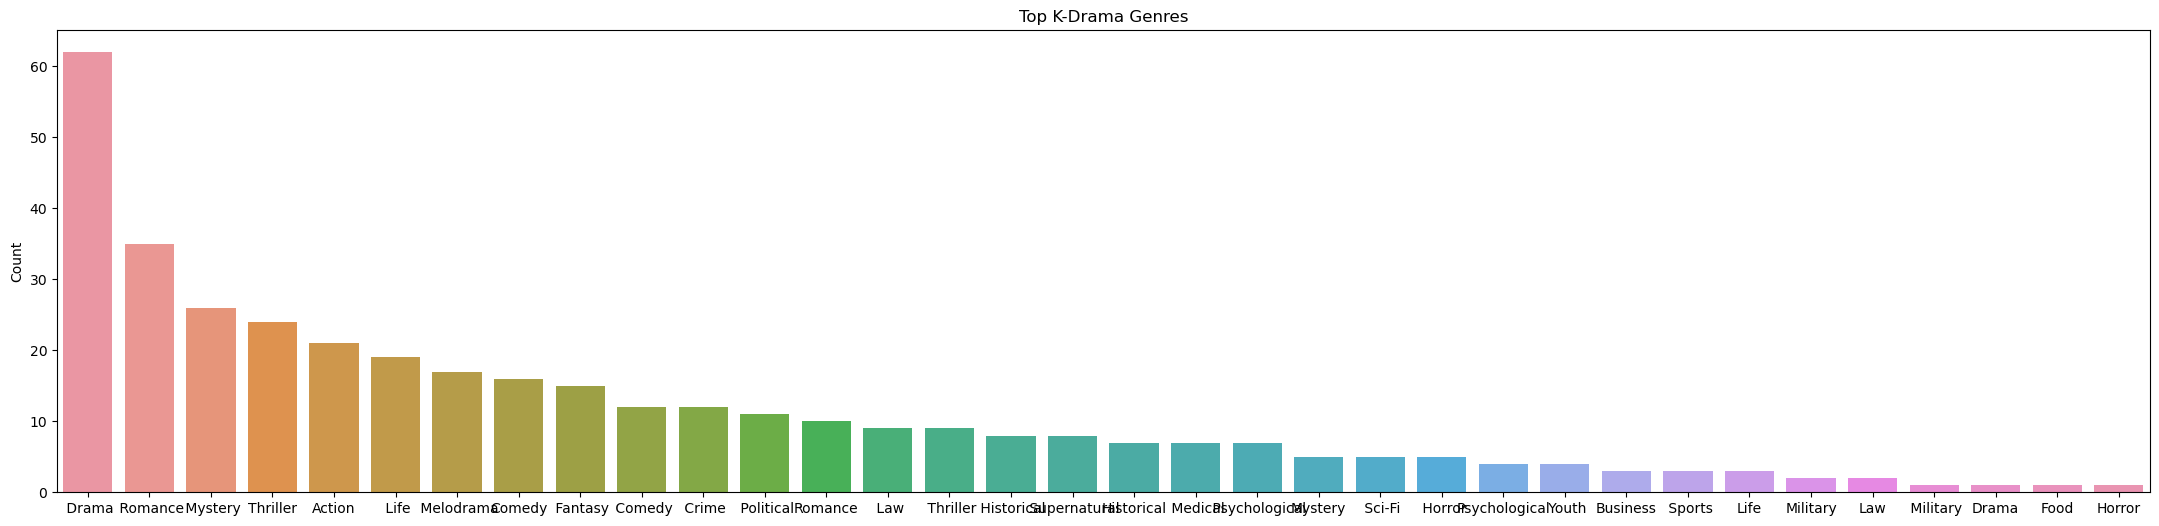

In [9]:
f, ax = plt.subplots(figsize=(27,6))
sns.barplot(x=genres_df["Count"].index, y="Count", ax=ax, ci=None, data=genres_df)
ax.set_title("Top K-Drama Genres")
plt.show()

In [10]:
actors_list = []
for actors in df_copy["Main Role"].to_list():
    actors = actors.strip().split(", ")
    for a in actors:
        actors_list.append(a)
        
actors_df = pd.DataFrame.from_dict(Counter(actors_list), orient='index').rename(columns={0:'Count'})
actors_df.sort_values(by='Count',ascending = False,inplace = True)
actors_df.head()

,Count
Lee Do Hyun,5
Jung Kyung Ho,5
Lee Jung Eun,5
Song Joong Ki,5
Yoo Yeon Seok,4


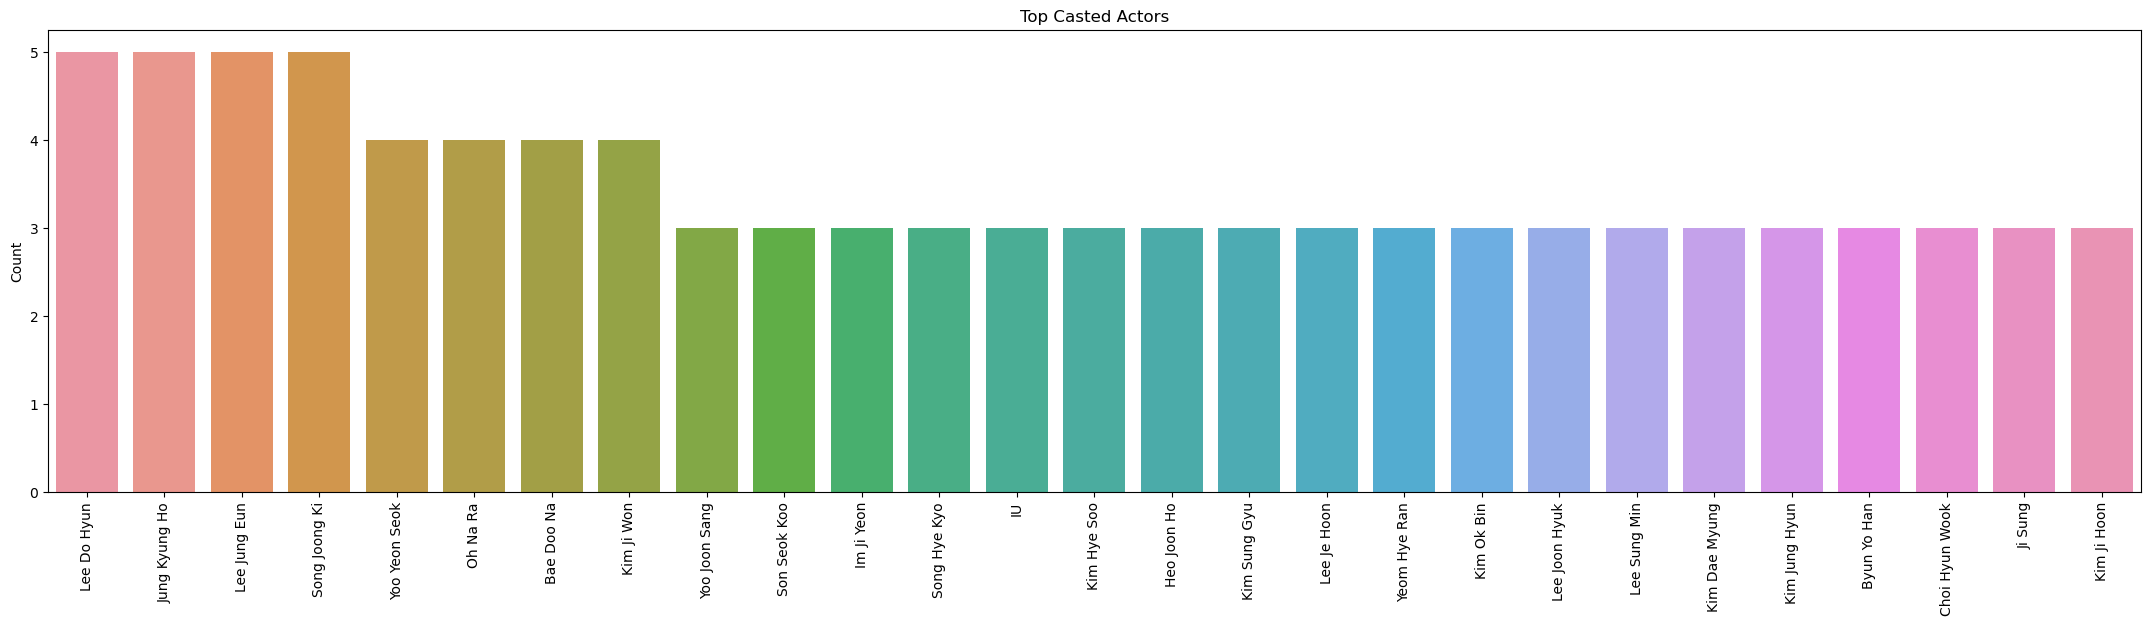

In [11]:
f, ax = plt.subplots(figsize=(27,6))
sns.barplot(x=actors_df[actors_df["Count"]>2].index, y="Count", ax=ax, ci=None, data=actors_df[actors_df["Count"]>2])
ax.set_title("Top Casted Actors")
plt.xticks(rotation=90)
plt.show()

In [12]:
tags_list = []
for tags in df_copy["Tags"].to_list():
    tags = tags.strip().split(", ")
    for t in tags:
        tags_list.append(t)
        
tags_df = pd.DataFrame.from_dict(Counter(tags_list), orient='index').rename(columns={0:'Count'})
tags_df.sort_values(by='Count',ascending = False,inplace = True)
tags_df.head()

,Count
Strong Female Lead,40
Bromance,25
Smart Female Lead,21
Murder,21
Nice Male Lead,19


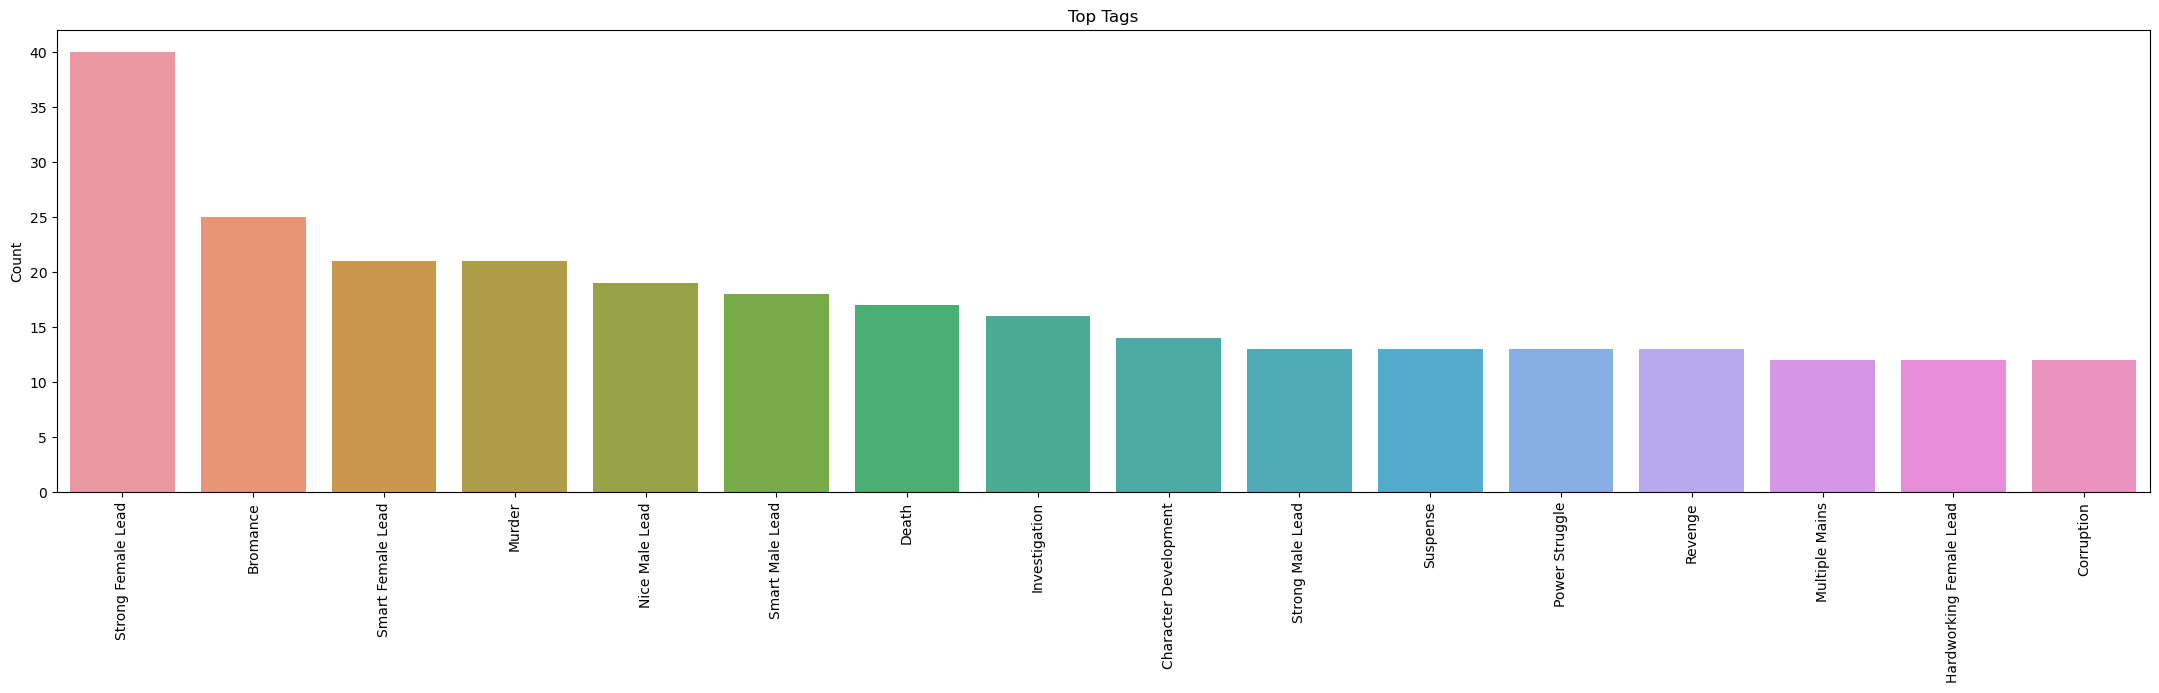

In [13]:
f, ax = plt.subplots(figsize=(27,6))
sns.barplot(x=tags_df[tags_df["Count"]>10].index, y="Count", ax=ax, ci=None, data=tags_df[tags_df["Count"]>10])
ax.set_title("Top Tags")
plt.xticks(rotation=90)
plt.show()

In [14]:
days_df = pd.DataFrame(df_copy["Day_aired"].explode().value_counts())
days_df.columns = ['Count']
days_df

,Count
Saturday,48
Friday,34
Sunday,28
Monday,21
Tuesday,21
Thursday,18
Wednesday,16


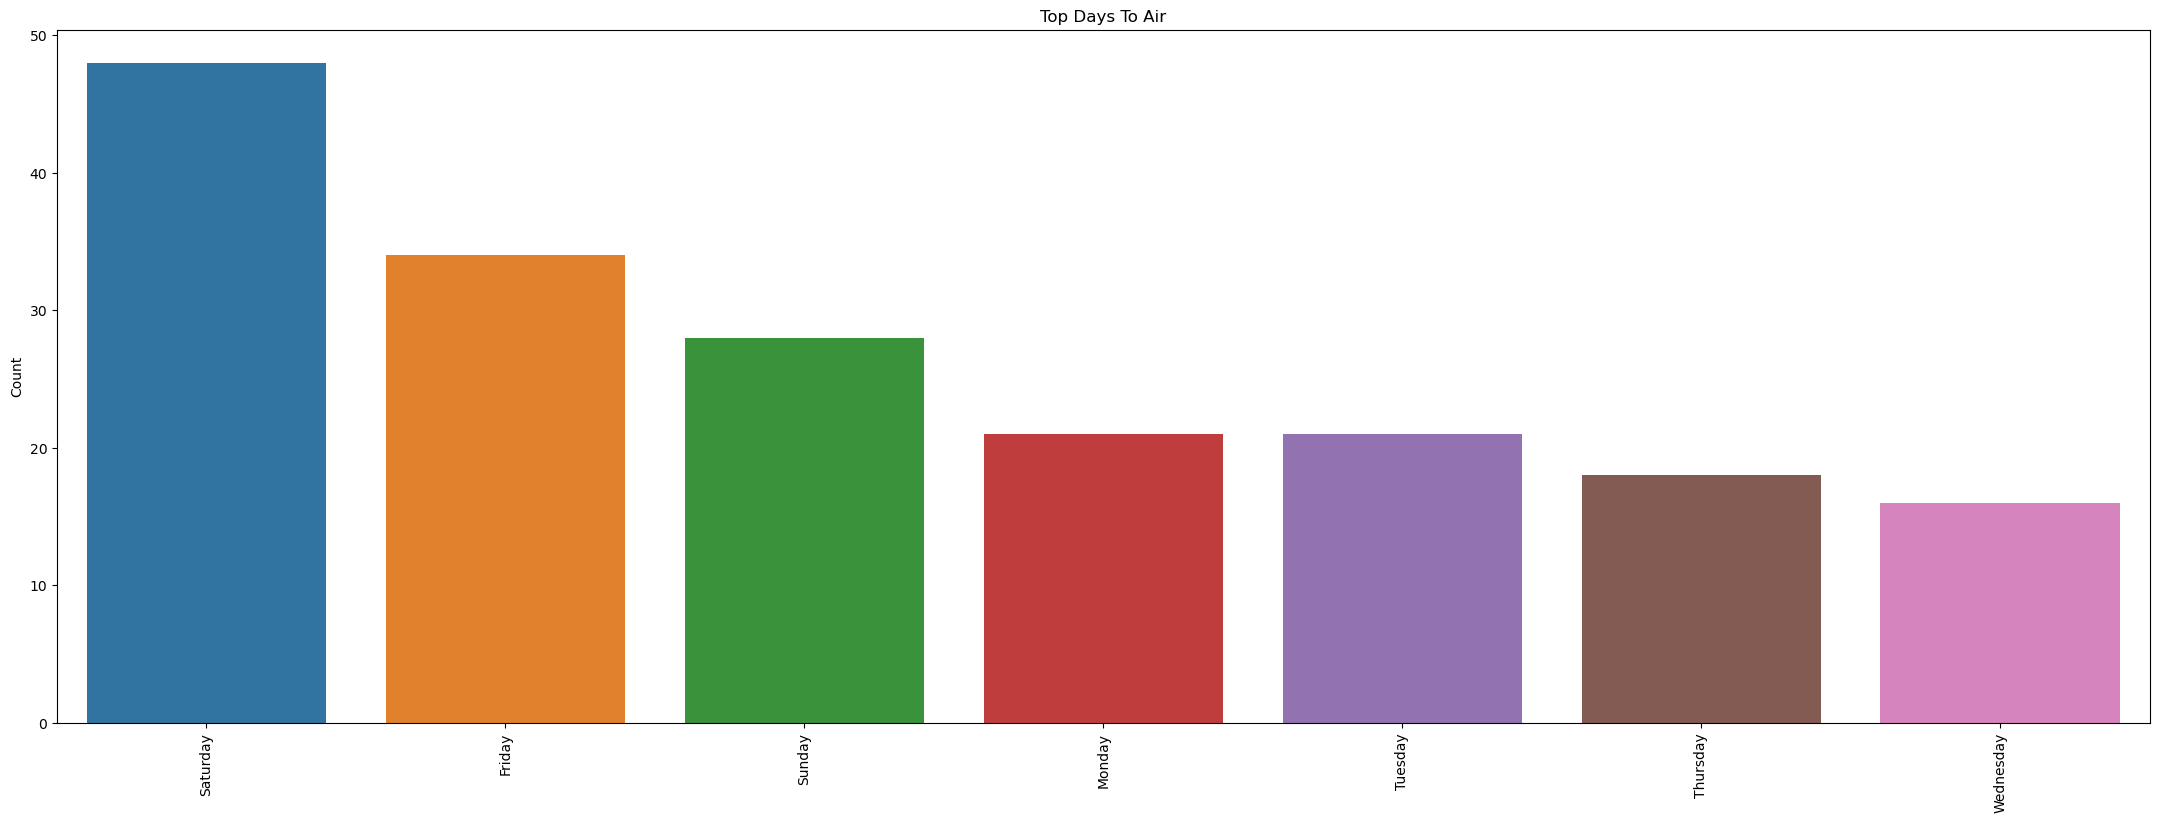

In [16]:
f, ax = plt.subplots(figsize=(27,9))
sns.barplot(x=days_df["Count"].index, y="Count", ax=ax, ci=None, data=days_df)
ax.set_title("Top Days To Air")
plt.xticks(rotation=90)
plt.show()